In [78]:
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def project1(projections):
    m = Basemap(projection=projections,resolution='c',lat_0=0,lon_0=0,
                boundinglat=0)#lat_0=41.508577,lon_0=148.331909,)#
    # draw parallels and meridians.
    m.drawmeridians(np.arange(0,360,60)) 
    m.drawparallels(np.arange(-90,90,30)) 
    
    m.drawcoastlines(linewidth=0.5) 
    #m.drawmapboundary()
    m.drawcountries()

    plt.title(projections+' projection')
    plt.show()

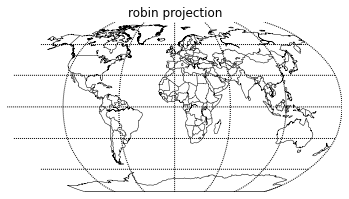

In [23]:
project1('robin')

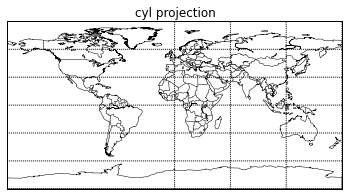

In [24]:
project1('cyl')

In [25]:
def project2(projections):
    m = Basemap(projection=projections,llcrnrlon=65.363159,
                llcrnrlat=-5.090944,urcrnrlon=168.370972,
                urcrnrlat=60.500525,resolution='c',lat_0=39.918163,
                lon_0=116.384826)#,boundinglat=39.918163)#
    # draw parallels and meridians.
    m.drawmeridians(np.arange(0,360,30)) 
    m.drawparallels(np.arange(-90,90,30)) 
    
    m.drawcoastlines(linewidth=0.5) 
    #m.drawmapboundary()
    m.drawcountries()

    plt.title(projections+' projection')
    plt.show()

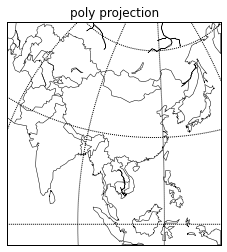

In [26]:
project2('poly')

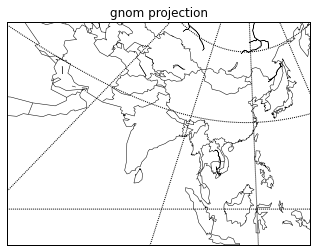

In [27]:
project2('gnom')

In [36]:
def project3(projections):
    m = Basemap(projection=projections,llcrnrlon=-180,
                llcrnrlat=-90,urcrnrlon=180,
                urcrnrlat=90,resolution='c',lat_0=0, #lat_0 must be set to 0
                lon_0=110)
    # draw parallels and meridians.
    m.drawmeridians(np.arange(0,360,30)) 
    m.drawparallels(np.arange(-90,90,30)) 
    
    # draw country borders
    m.drawcoastlines(linewidth=0.5) 
    #m.drawmapboundary()
    m.drawcountries()

    plt.title(projections+' projection')
    plt.show()

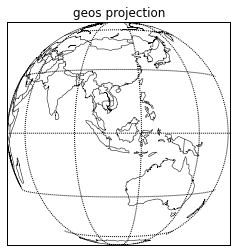

In [37]:
project3('geos')

In [ ]:
def plot_gdal_file ( input_dataset, x, vmin=0, vmax=100 ):
    # Need to get the geotransform (ie, corners)
    a = gdal.Open(nameras, gdal.GA_ReadOnly)
    geo = a.GetGeoTransform()
    data = x

    # We need to flip the raster upside down
    data = np.flipud( data )

    # Define a cylindrical projection
    projection_opts={'projection':'cyl','resolution':'h'}

    # These are the extents in the native raster coordinates
    extent = [ geo[0],  geo[0] + input_dataset.RasterXSize*geo[1], \
        geo[3], geo[3] + input_dataset.RasterYSize*geo[5]]
    map = Basemap( llcrnrlon=extent[0], llcrnrlat=extent[3], \
                 urcrnrlon=extent[1],urcrnrlat=extent[2],  ** projection_opts)

    # Set up some variables of the map presentation
    cmap = plt.cm.gist_rainbow
    cmap.set_under ('0.8' )
    cmap.set_bad('0.8' )
    cmap.set_over ('0.8')

    # Set range colourbar, draw country borders
    map.imshow( data, vmin=vmin, vmax=vmax, cmap=cmap, interpolation='nearest')
    map.drawcoastlines (linewidth=0.5, color='k')
    map.drawcountries(linewidth=0.5, color='k')
    map.drawmeridians( np.arange(0,360,5), color='k')
    map.drawparallels( np.arange(-90,90,5), color='k')
    map.drawmapboundary()

    cb = plt.colorbar( orientation='horizontal', fraction=0.10, shrink=0.8)

    # Add custom title to map
    plt.title('Landcovertype '+str(i)+' (subset contains: '+str(z)+' values)')
    plt.show()
    
nameras = maskRastr
InRas = SubsetImg(nameras)
a = gdal.Open(nameras, gdal.GA_ReadOnly)
x = np.empty(InRas.shape); x[:] = 127
i = '0 - 16'
z = InRas.shape[0]*InRas.shape[1]
plot_gdal_file(a,InRas,vmin=0,vmax=17) # Return landcover dataset

In [56]:
from osgeo import gdal
import numpy as np

In [61]:
pathToRaster = r'I:\Data\anomaly//ano_DOY2002170.tif'
raster = gdal.Open(pathToRaster, gdal.GA_ReadOnly)
band = raster.GetRasterBand(1)
NaN = band.GetNoDataValue()
print NaN

None


In [69]:
raster.RasterXSize, raster.RasterYSize

(1440, 720)

In [ ]:
pathToRaster = r'I:\Data\anomaly//ano_DOY2002170.tif'
raster = gdal.Open(pathToRaster, gdal.GA_ReadOnly)
geo = raster.GetGeoTransform()
array = raster.GetRasterBand(1).ReadAsArray()
msk_array = np.ma.masked_equal(array, value = 65535)
data = np.flipud( msk_array )
extent = [ geo[0], geo[3] + raster.RasterYSize*geo[5], geo[0] + raster.RasterXSize*geo[1], geo[3], ]

# create figure instance. 
fig = plt.figure(figsize=(16,12)) 

# create an axes instance, leaving room for colorbars on right and bottom. 
ax = fig.add_axes([0.05,0.15,0.8,0.8]) # color on bottom 

#map = Basemap(projection='cyl', llcrnrlon=extent[0], llcrnrlat=extent[1], urcrnrlon=extent[2], urcrnrlat=extent[3], resolution='c',lon_0=0,lat_0=0,)
#llcrnrlon,llcrnrlat,ucrnrlon,urcrnrlat
map = Basemap(projection='lcc', resolution='c',llcrnrlon=45., llcrnrlat=55, urcrnrlon=-107,urcrnrlat=50,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)#lon_0=110,lat_0=0,)

nx = raster.RasterXSize
ny = raster.RasterYSize
xin = np.linspace(map.xmin,map.xmax,nx) # nx is the number of x points on the grid
yin = np.linspace(map.ymin,map.ymax,ny) # ny in the number of y points on the grid

lons = np.arange(-180,180.01,0.25) 
lats  = np.arange(-90,90.01,0.25) 
lons, lats = np.meshgrid(lons,lats) 
xout,yout = map(lons, lats)
map.plot(xout, yout)
#xout,yout = map(lons*180./np.pi, lats*180./np.pi)
 
#dataout = mpl_toolkits.basemap.interp(data, xin, yin, xout, yout, masked=True)

#map.imshow(data, vmin=-1000, vmax=1000)
#map.imshow(dataout, vmin=-1000, vmax=1000)

map.drawmeridians(np.arange(0,360,60), linewidth=.5, labels=[1,0,0,1], labelstyle='+/-', color='grey' ) 
map.drawparallels(np.arange(-90,90,30), linewidth=.5, labels=[1,0,0,1], labelstyle='+/-', color='grey') 
    
map.drawcoastlines(linewidth=0.5) 
map.drawmapboundary(linewidth=0.5, color='grey')
map.drawcountries()
#date =datetime.utcnow()
#map.nightshade(date)
#map.fillcontinents(color=None,lake_color='white')

cb = map.colorbar(location="bottom", size="5%", pad="6%")
cb.set_label('Soil Moisture 1000 = 100%')

plt.show()


In [91]:
nx = raster.RasterXSize
ny = raster.RasterYSize
xin = np.linspace(map.xmin,map.xmax,nx) # nx is the number of x points on the grid
yin = np.linspace(map.ymin,map.ymax,ny) # ny in the number of y points on the grid

lons = np.arange(-180,180.01,0.25) 
lats  = np.arange(-90,90.01,0.25) 
lons, lats = np.meshgrid(lons,lats) 
xout,yout = map(lons, lats)

In [92]:
nx

1440

In [93]:
ny

720

In [94]:
xin

array([-180.        , -179.74982627, -179.49965254, ...,  179.49965254,
        179.74982627,  180.        ])

In [95]:
yin

array([-90.        , -89.74965229, -89.49930459, -89.24895688,
       -88.99860918, -88.74826147, -88.49791377, -88.24756606,
       -87.99721836, -87.74687065, -87.49652295, -87.24617524,
       -86.99582754, -86.74547983, -86.49513213, -86.24478442,
       -85.99443672, -85.74408901, -85.49374131, -85.2433936 ,
       -84.9930459 , -84.74269819, -84.49235049, -84.24200278,
       -83.99165508, -83.74130737, -83.49095967, -83.24061196,
       -82.99026426, -82.73991655, -82.48956885, -82.23922114,
       -81.98887344, -81.73852573, -81.48817803, -81.23783032,
       -80.98748261, -80.73713491, -80.4867872 , -80.2364395 ,
       -79.98609179, -79.73574409, -79.48539638, -79.23504868,
       -78.98470097, -78.73435327, -78.48400556, -78.23365786,
       -77.98331015, -77.73296245, -77.48261474, -77.23226704,
       -76.98191933, -76.73157163, -76.48122392, -76.23087622,
       -75.98052851, -75.73018081, -75.4798331 , -75.2294854 ,
       -74.97913769, -74.72878999, -74.47844228, -74.22

In [96]:
lons

array([[-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       ..., 
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ]])

In [97]:
lats

array([[-90.  , -90.  , -90.  , ..., -90.  , -90.  , -90.  ],
       [-89.75, -89.75, -89.75, ..., -89.75, -89.75, -89.75],
       [-89.5 , -89.5 , -89.5 , ..., -89.5 , -89.5 , -89.5 ],
       ..., 
       [ 89.5 ,  89.5 ,  89.5 , ...,  89.5 ,  89.5 ,  89.5 ],
       [ 89.75,  89.75,  89.75, ...,  89.75,  89.75,  89.75],
       [ 90.  ,  90.  ,  90.  , ...,  90.  ,  90.  ,  90.  ]])

In [98]:
xout

array([[-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       ..., 
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ],
       [-180.  , -179.75, -179.5 , ...,  179.5 ,  179.75,  180.  ]])

In [100]:
yout

array([[-90.  , -90.  , -90.  , ..., -90.  , -90.  , -90.  ],
       [-89.75, -89.75, -89.75, ..., -89.75, -89.75, -89.75],
       [-89.5 , -89.5 , -89.5 , ..., -89.5 , -89.5 , -89.5 ],
       ..., 
       [ 89.5 ,  89.5 ,  89.5 , ...,  89.5 ,  89.5 ,  89.5 ],
       [ 89.75,  89.75,  89.75, ...,  89.75,  89.75,  89.75],
       [ 90.  ,  90.  ,  90.  , ...,  90.  ,  90.  ,  90.  ]])

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

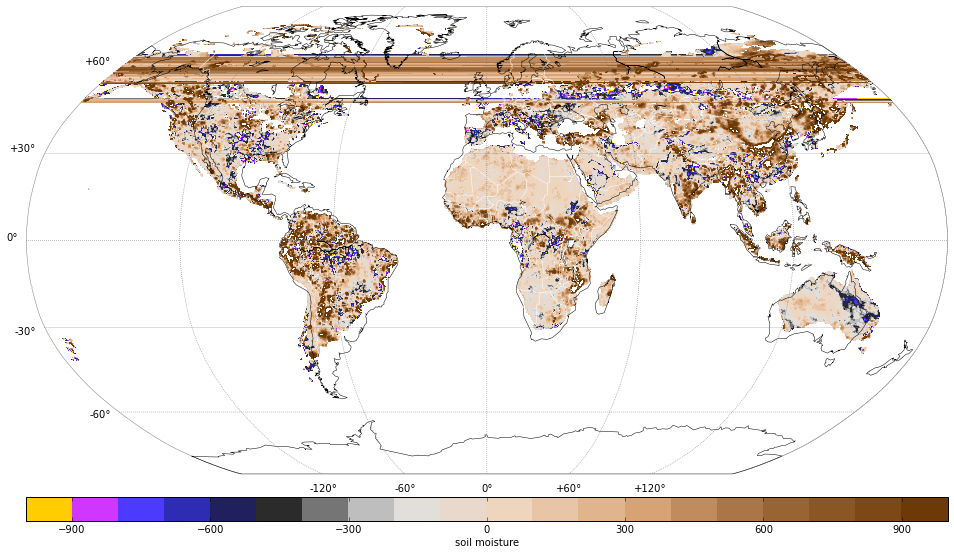

In [79]:
pathToRaster = r'I:\Data\anomaly//ano_DOY2002170.tif'
raster = gdal.Open(pathToRaster, gdal.GA_ReadOnly)
geo = raster.GetGeoTransform()
array = raster.GetRasterBand(1).ReadAsArray()
msk_array = np.ma.masked_equal(array, value = 65535)
datain = np.flipud( msk_array )
extent = [ geo[0], geo[3] + raster.RasterYSize*geo[5], geo[0] + raster.RasterXSize*geo[1], geo[3], ]

from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt 
import numpy as np

# create figure instance. 
fig = plt.figure(figsize=(16,12)) 

# create an axes instance, leaving room for colorbars on right and bottom. 
ax = fig.add_axes([0.05,0.15,0.8,0.8]) # color on bottom 

# Setup map. 
map = Basemap(projection='robin',resolution='c',lat_0=0,lon_0=0)
# draw coastlines, country boundaries, fill continents. 
map.drawmeridians(np.arange(0,360,60), linewidth=.5, labels=[1,0,0,1], labelstyle='+/-', color='grey' ) 
map.drawparallels(np.arange(-90,90,30), linewidth=.5, labels=[1,0,0,1], labelstyle='+/-', color='grey') 

#lons = np.arange(-180,180,0.25) 
#lats  = np.arange(-90,90,0.25) 
#lons, lats = np.meshgrid(lons,lats) 
#xout,yout = map(lons, lats)


#map.plot(xout,yout,'bo')
map.drawcoastlines(linewidth=0.5) 
map.drawmapboundary(fill_color='white', linewidth=0.5, color='grey')
map.drawcountries(color='white')
#date =datetime.utcnow()
#map.nightshade(date)
#map.fillcontinents(color='lightgrey',lake_color='white')

ny = datain.shape[0]; nx = datain.shape[1]
lons,lats = map.makegrid(nx,ny)
x,y = map(lons,lats)
clevs = [-1000,-900,-800,-700,-600,-500,-400,-300,-200,-100,0,100,200,300,400,500,600,700,800,900,1000]
cs = map.contourf(x,y, data, clevs, cmap=cm.s3pcpn)
cbar = map.colorbar(cs,location='bottom',pad='5%')
cbar.set_label('soil moisture')

plt.show()

In [20]:
lonpt,latpt = map(xout,yout,inverse=True)
lonpt

array([[ 179.99999996, -179.75000004, -179.50000004, ...,  179.25000004,
         179.50000004,  179.75000004],
       [-179.99999943, -179.74999943, -179.49999943, ...,  179.24999943,
         179.49999943,  179.74999943],
       [ 179.99999972, -179.75000028, -179.50000028, ...,  179.25000028,
         179.50000028,  179.75000028],
       ..., 
       [ 179.99999979, -179.75000021, -179.50000021, ...,  179.25000021,
         179.50000021,  179.75000021],
       [ 179.99999972, -179.75000028, -179.50000028, ...,  179.25000028,
         179.50000028,  179.75000028],
       [-179.99999943, -179.74999943, -179.49999943, ...,  179.24999943,
         179.49999943,  179.74999943]])

In [23]:
import mpl_toolkits

In [22]:
mpl_toolkits.basemap.interp(datain, xin, yin, xout, yout, order=0, 
dataout = mpl_toolkits.basemap.interp(data, xin, yin, xout, yout, masked=True)

NameError: name 'mpl_toolkits' is not defined

In [25]:
from osgeo import gdal

In [61]:
pathToRaster = r'I:\Data\anomaly//ano_DOY2002170.tif'
raster = gdal.Open(pathToRaster, gdal.GA_ReadOnly)
geo = raster.GetGeoTransform()
array = raster.GetRasterBand(1).ReadAsArray()
msk_array = np.ma.masked_equal(array, value = 65535)
datain = np.flipud( msk_array )
extent = [ geo[0], geo[3] + raster.RasterYSize*geo[5], geo[0] + raster.RasterXSize*geo[1], geo[3], ]
nx = raster.RasterXSize
ny = raster.RasterYSize
xin = np.linspace(map.xmin,map.xmax,nx) # nx is the number of x points on the grid
yin = np.linspace(map.ymin,map.ymax,ny) # ny in the number of y points on the grid
lons = np.arange(-180,180,0.25) 
lats  = np.arange(-90,90,0.25) 
#lons, lats = np.meshgrid(lons,lats) 
#xout,yout = map(lons, lats)
print len(xin),len(yin),len(xout),len(yout), data.shape

1440 720 720 720 (720, 1440)


In [67]:
ny = datain.shape[0]; nx = datain.shape[1]
lons,lats = map.makegrid(nx,ny)
x,y = m(lons,lats)
clevs = [-1000,-900,-800,-700,-600,-500,-400,-300,-200,-100,0,100,200,300,400,500,600,700,800,900,1000]
cs = map.contourf(x,y, data, clevs, cmap=cm.s3pcpn)
cbar = map.colorbar(cs,location='bottom',pad='5%')
cbar.set_label('soil moisture')

In [73]:
dataout = mpl_toolkits.basemap.interp(datain, xin, yin, xout, yout, order=0)

In [76]:
dataout.shape

(720, 1440)

In [18]:
xout

array([[  7946423.80553026,   7958979.87825175,   7971535.95097324, ...,
         25989500.30630527,  26002056.37902676,  26014612.45174825],
       [  7917348.75459389,   7929945.20933056,   7942541.66406724, ...,
         26018454.21119608,  26031050.66593276,  26043647.12066944],
       [  7887698.43794226,   7900336.07367428,   7912973.70940631, ...,
         26047980.98486166,  26060618.62059369,  26073256.25632571],
       ..., 
       [  7857482.79337681,   7870162.39528185,   7882841.99718688, ...,
         26078070.73090809,  26090750.33281312,  26103429.93471815],
       [  7887698.43794226,   7900336.07367428,   7912973.70940631, ...,
         26047980.98486166,  26060618.62059369,  26073256.25632571],
       [  7917348.75459389,   7929945.20933056,   7942541.66406724, ...,
         26018454.21119608,  26031050.66593276,  26043647.12066944]])

In [42]:
from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt

# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.

nc = NetCDFFile('http://water.weather.gov/precip/examples/nws_precip_conus_20061222.nc')
# data from http://water.weather.gov/precip/
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')
# add title
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
plt.show()

RuntimeError: NetCDF: Malformed or inaccessible DAP DDS